Football/Soccer # Football/Soccer | Bundesliga Player Database
Bundesliga Player Database: Complete Profiles, Stats, and Clubs of each Player

# About Dataset
The Bundesliga Players dataset provides a comprehensive collection of information on every player in the German Bundesliga football league. From renowned goalkeepers to talented defenders, this dataset offers an extensive range of player details including their names, full names, ages, heights, nationalities, places of birth, prices, maximum prices, positions, shirt numbers, preferred foot, current clubs, contract expiration dates, dates of joining the clubs, player agents, and outfitters. Whether you're a passionate football fan, a sports analyst, or a fantasy football enthusiast, this dataset serves as a valuable resource for exploring and analyzing the profiles of Bundesliga players, enabling you to delve into their backgrounds, performance statistics, and club affiliations. Discover the stars of German football and gain insights into their careers with this comprehensive Bundesliga Players dataset.

# Import LIbraries
### Pandas
### Numpy
### Matlotlib
### Seaborn
### Cufflinks


In [1]:
import pandas as pd

In [2]:
import numpy as np 

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode,download_plotlyjs,plot,iplot

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
import cufflinks as cf
cf.go_offline()

# Read Dataset

In [6]:
data=pd.read_csv('/kaggle/input/bundesliga-soccer-player/bundesliga_player.csv',index_col='Unnamed: 0')
data.head()

,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter
0,Manuel Neuer,Manuel Peter Neuer,37,1.93,Germany,Gelsenkirchen,7.0,45.0,Goalkeeper,1,right,Bayern Munich,2024-06-30,2011-07-01,PRO Profil GmbH,adidas
1,Yann Sommer,NaN,34,1.83,Switzerland,Morges,5.0,13.0,Goalkeeper,27,right,Bayern Munich,2025-06-30,2023-01-19,Relatives,Puma
2,Sven Ulreich,NaN,34,1.92,Germany,Schorndorf,0.9,6.0,Goalkeeper,26,right,Bayern Munich,2024-06-30,2021-07-01,BMS Sportconsulting ...,adidas
3,Johannes Schenk,NaN,20,1.91,Germany,Schweinfurt,0.3,0.3,Goalkeeper,35,NaN,Bayern Munich,2024-06-30,2022-07-01,11WINS,NaN
4,Matthijs de Ligt,NaN,23,1.89,Netherlands,Leiderdorp,75.0,75.0,Defender - Centre-Back,4,right,Bayern Munich,2027-06-30,2022-07-19,Rafaela Pimenta,adidas


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 0 to 514
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              515 non-null    object 
 1   full_name         229 non-null    object 
 2   age               515 non-null    int64  
 3   height            515 non-null    float64
 4   nationality       515 non-null    object 
 5   place_of_birth    510 non-null    object 
 6   price             510 non-null    float64
 7   max_price         510 non-null    float64
 8   position          515 non-null    object 
 9   shirt_nr          515 non-null    int64  
 10  foot              506 non-null    object 
 11  club              515 non-null    object 
 12  contract_expires  481 non-null    object 
 13  joined_club       515 non-null    object 
 14  player_agent      488 non-null    object 
 15  outfitter         193 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory u

In [8]:
data.describe()

,age,height,price,max_price,shirt_nr
count,515.000000,515.000000,510.000000,510.000000,515.000000
mean,25.683495,1.847612,8.482794,13.513627,19.798058
std,4.700238,0.060996,14.653440,18.659222,12.414768
min,17.000000,1.680000,0.025000,0.100000,1.000000
25%,22.000000,1.800000,1.200000,2.500000,9.000000
50%,25.000000,1.850000,3.500000,7.000000,20.000000
75%,29.000000,1.890000,9.000000,16.750000,29.000000
max,39.000000,2.000000,120.000000,150.000000,49.000000


In [9]:
data.columns

Index(['name', 'full_name', 'age', 'height', 'nationality', 'place_of_birth',
       'price', 'max_price', 'position', 'shirt_nr', 'foot', 'club',
       'contract_expires', 'joined_club', 'player_agent', 'outfitter'],
      dtype='object')

# Data Cleaning

In [10]:
msng_value_counts=data.isnull().sum()

In [11]:
msng_value_counts

name                  0
full_name           286
age                   0
height                0
nationality           0
place_of_birth        5
price                 5
max_price             5
position              0
shirt_nr              0
foot                  9
club                  0
contract_expires     34
joined_club           0
player_agent         27
outfitter           322
dtype: int64

### Percentage of Missing Data

In [12]:
total_cell=np.product(data.shape)
toal_missimg=msng_value_counts.sum()
percaentagemissimg=(toal_missimg/total_cell)*100


In [13]:
percaentagemissimg
print("In This Dataset {:.2f}% of Data Is Missing.".format(percaentagemissimg))

In This Dataset 8.41% of Data Is Missing.


#### Nationality

In [14]:
nat=data['nationality'].nunique()

In [15]:
print("Total Nationality {}.".format(nat))

Total Nationality 147.


###### "In this dataset, individuals with dual nationality have been considered based on their first nationality for analysis."
###### "We focus on the first nationality mentioned to analyze the distribution of players."

First of all  convert all the country name in Nationality in lower case.

In [16]:
data['nationality']=data['nationality'].str.lower()
data['nationality']=data['nationality'].str.strip()

Now make a new colum in which only use first nationality are taken.

In [17]:
data['first_nationality'] = data['nationality'].str.split().str[0]
nationality_counts = data['first_nationality'].value_counts


In [18]:
Snat=data['first_nationality'].nunique()

In [19]:
print("Total Nationality {}.".format(Snat))

Total Nationality 64.


# Visuilizations

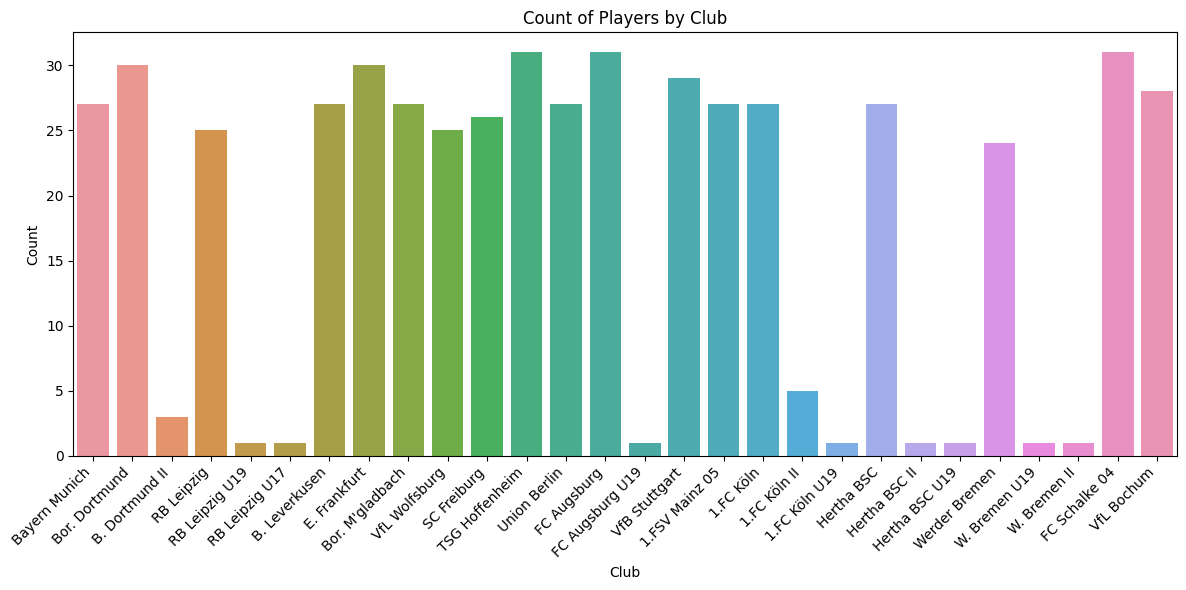

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='club')
plt.xlabel('Club')
plt.ylabel('Count')
plt.title('Count of Players by Club')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

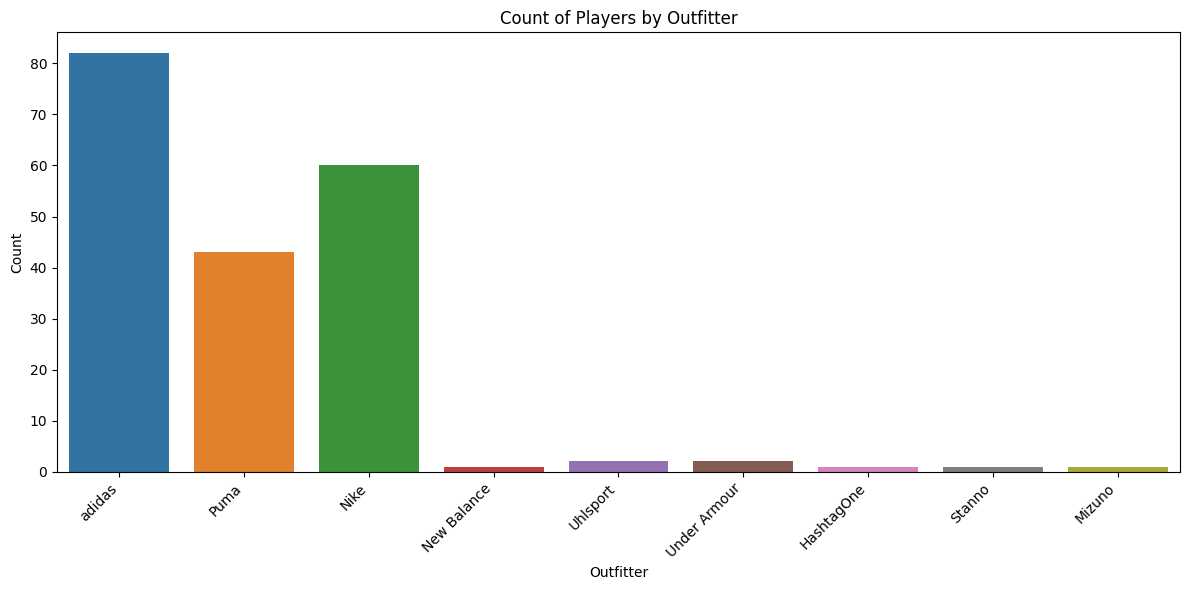

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data,x='outfitter')
plt.xlabel('Outfitter')
plt.ylabel('Count')
plt.title('Count of Players by Outfitter')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


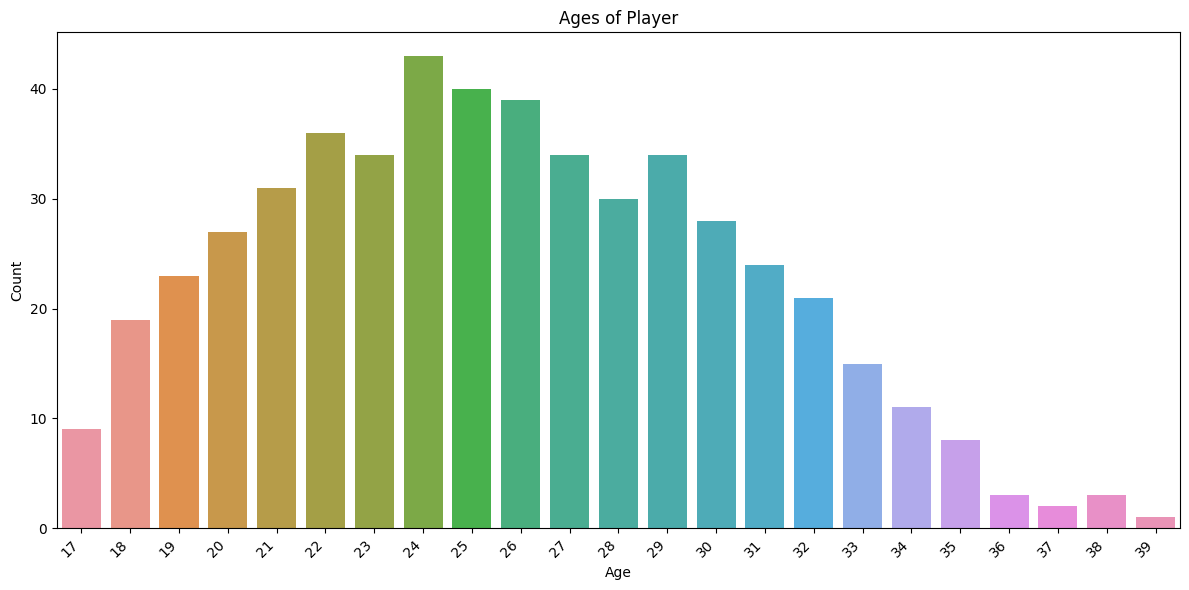

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data,x='age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Ages of Player')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


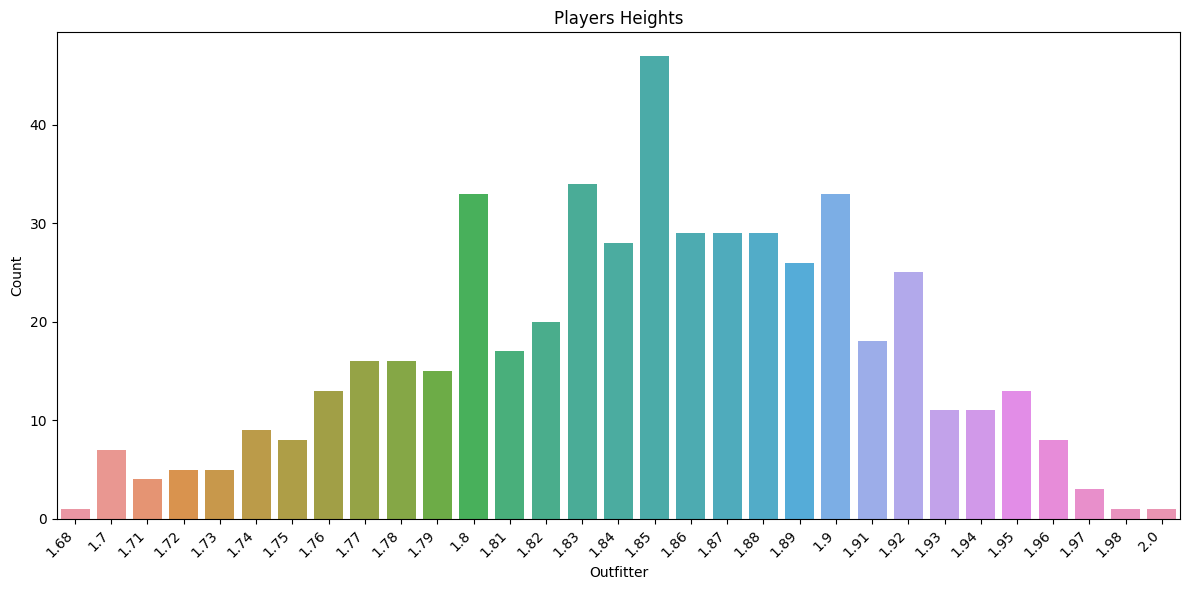

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data,x='height')
plt.xlabel('Outfitter')
plt.ylabel('Count')
plt.title('Players Heights')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


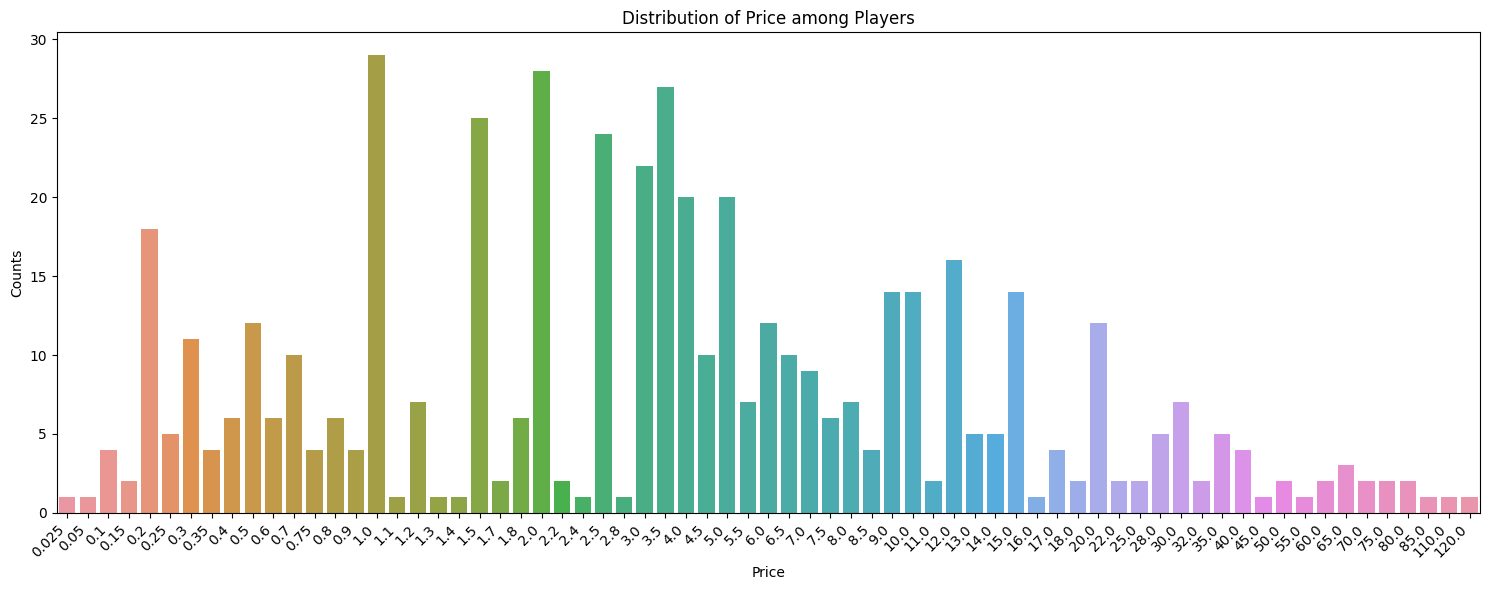

In [24]:
plt.figure(figsize=(15, 6))
sns.countplot(data=data,x='price')
plt.ylabel('Counts')
plt.xlabel('Price')
plt.title('Distribution of Price among Players')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


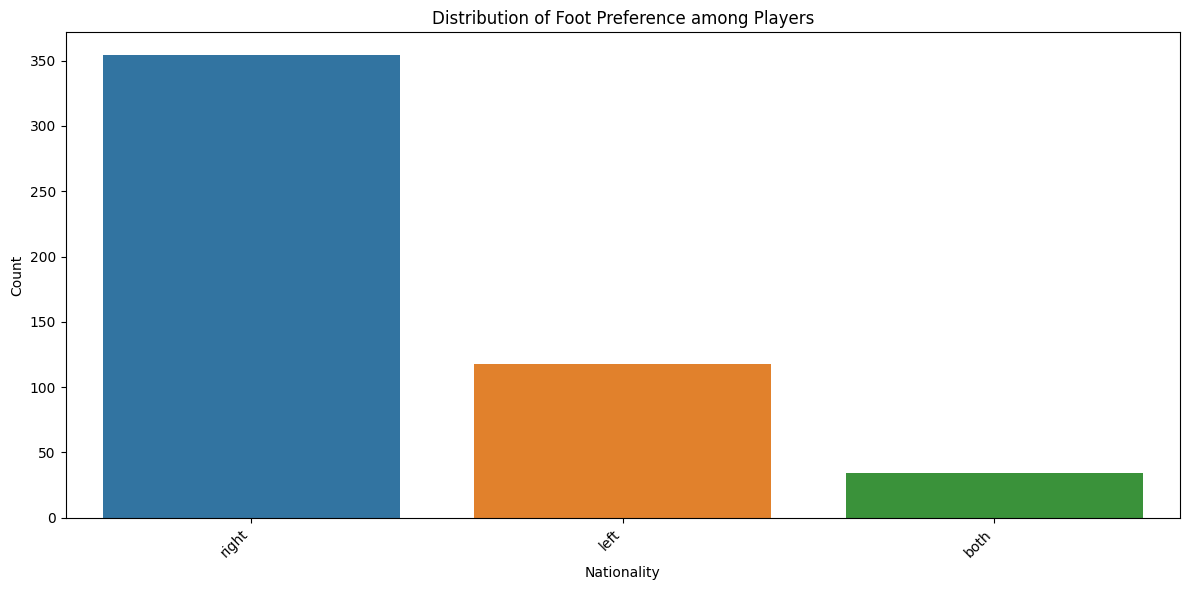

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data,x='foot')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.title('Distribution of Foot Preference among Players')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

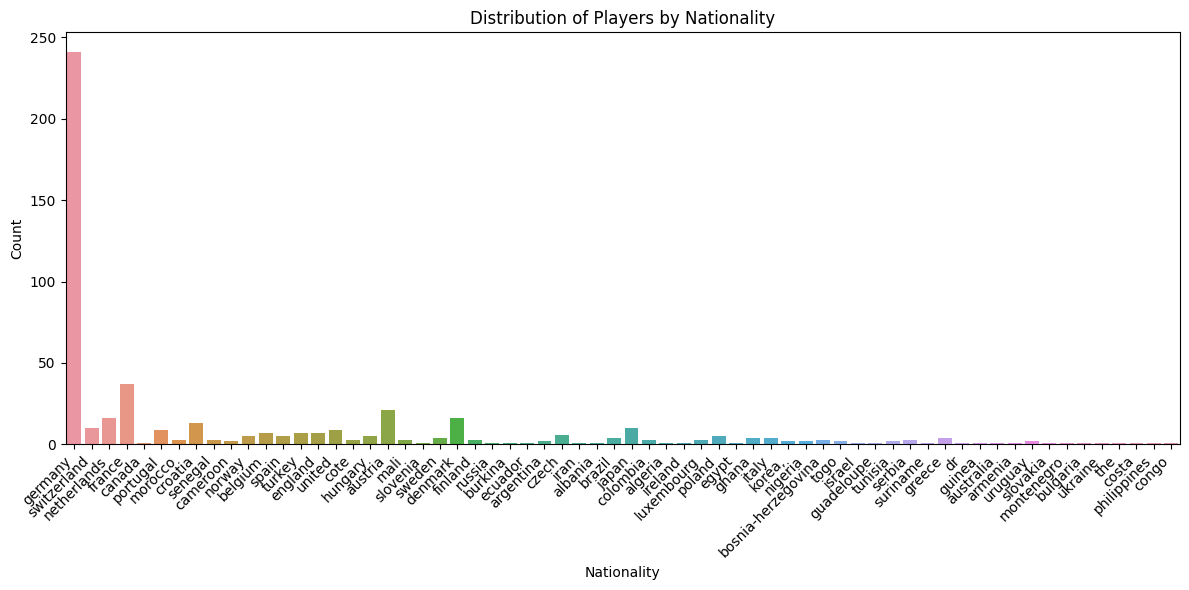

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data,x='first_nationality')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.title('Distribution of Players by Nationality')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



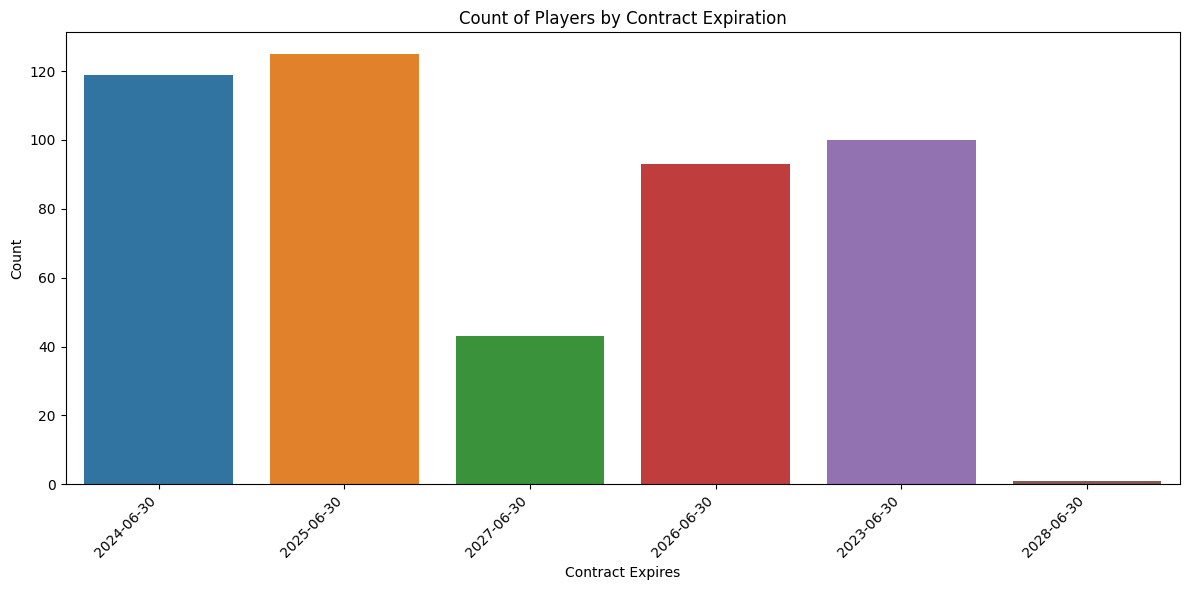

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='contract_expires')
plt.xlabel('Contract Expires')
plt.ylabel('Count')
plt.title('Count of Players by Contract Expiration')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()